# **LAB1: LINEAR REGRESSION**
**Đề bài:** Xây dựng model Linear Regression dự đoán thời gian chạy chương trình dựa trên độ lớn bộ dữ liệu. Tập train và test được giảng viên cung cấp dưới dạng hai file .txt.


**Nhóm sinh viên thực hiện: NSA**
    
- 18521144 - Nguyễn Hữu Nghĩa
- 18521353 - Trần Ngọc Sương
- 20521072 - Nguyễn Thị Kim Anh

In [ ]:
#Import những packages cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_absolute_error as MAE

In [ ]:
#Cấp quyền truy cập drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **READ DATA TỪ FILE TXT VÀ EXPLORATION DATA**

**X_train**

In [ ]:
#Sử dụng pandas.read_csv để đọc dữ liệu từ file "train.txt"
train_set = pd.read_csv("/content/drive/MyDrive/th1_data/train.txt", names = ["X", "y"], header = None)

In [ ]:
train_set.shape

(71115, 2)

In [ ]:
train_set.dtypes

X      int64
y    float64
dtype: object

In [ ]:
#Lấy mẫu 5 bộ
sample_train = train_set.sample(n=5)
sample_train

,X,y
2586,9708790,0.818996
40715,1358077,0.099928
2591,1407803,0.101815
15921,1427289,0.104260
62904,4300472,0.345486


In [ ]:
#Desrcibe bộ test
train_set.describe()

,X,y
count,7.111500e+04,71115.000000
mean,4.998766e+06,0.406785
std,2.882618e+06,0.244039
min,2.550000e+02,0.000009
25%,2.496521e+06,0.192746
50%,5.010144e+06,0.403410
75%,7.481742e+06,0.616155
max,9.999882e+06,0.983776


In [ ]:
#Remove những datapoint quá nhỏ
train_set = train_set[train_set.y>0.4]

In [ ]:
train_set.describe()

,X,y
count,3.585200e+04,35852.000000
mean,7.472571e+06,0.616449
std,1.452713e+06,0.127023
min,4.184349e+06,0.400010
25%,6.212990e+06,0.506315
50%,7.459315e+06,0.614102
75%,8.735773e+06,0.725983
max,9.999882e+06,0.983776


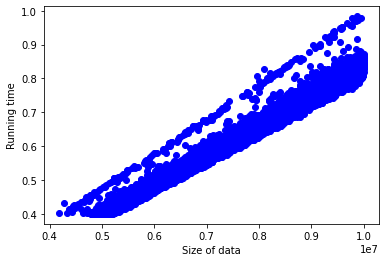

In [ ]:
#Plotting data train
ax = plt.axes()
ax.scatter(train_set.X, train_set.y, color = 'blue')
ax.set(xlabel = 'Size of data',
       ylabel = 'Running time',)
plt.show()

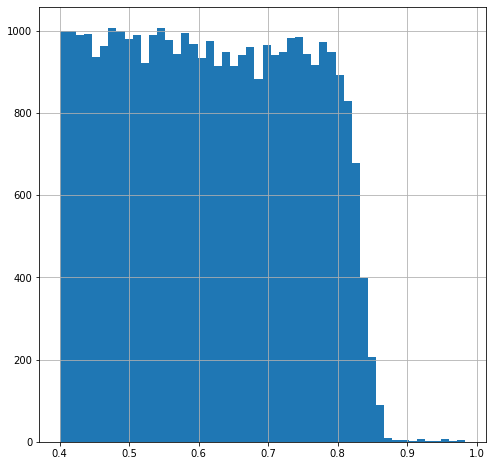

In [ ]:
train_set.y.hist(bins = 50, figsize = (8,8))

**X_test, y_test**

**data1**

In [ ]:
#Sử dụng pandas.read_csv để đọc dữ liệu từ file "test.txt"
test_set = pd.read_csv("/content/drive/MyDrive/th1_data/test.txt", names = ["X", "y"], header = None)

In [ ]:
test_set.shape

(10590, 2)

In [ ]:
test_set.dtypes

X      int64
y    float64
dtype: object

In [ ]:
#Xem thử 5 bộ đầu
sample_test = test_set.sample(n = 5)
sample_test

,X,y
2204,28193297,2.44362
6420,39280458,3.64339
5071,33477683,2.90214
3074,35602759,3.09485
3372,26337136,2.27539


In [ ]:
#Desrcibe bộ test
test_set.describe()

,X,y
count,1.059000e+04,10590.000000
mean,2.999277e+07,2.642812
std,5.759381e+06,0.537305
min,2.000026e+07,1.669640
25%,2.503806e+07,2.180550
50%,2.994436e+07,2.639820
75%,3.500845e+07,3.100155
max,3.999734e+07,4.287660


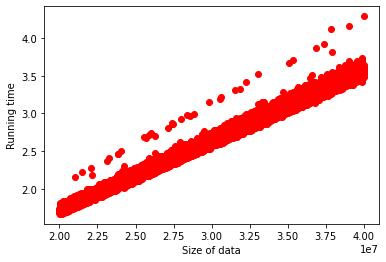

In [ ]:
#Plotting data test
ax = plt.axes()
ax.scatter(test_set.X, test_set.y, color = 'red')
ax.set(xlabel = 'Size of data',
       ylabel = 'Running time',)
plt.show()

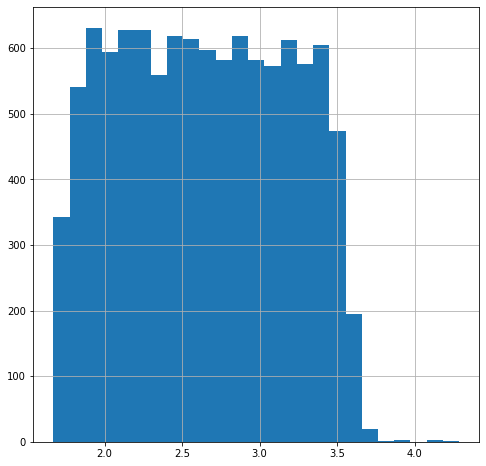

In [ ]:
test_set.y.hist(bins = 25, figsize = (8, 8))

**data4**

In [ ]:
test_set_4 = pd.read_csv("/content/drive/MyDrive/th1_data/data4.txt", names = ["X", "y"], header = None)

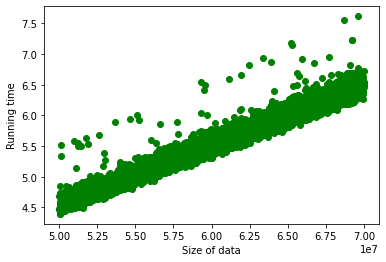

In [ ]:
#Plotting data test
ax = plt.axes()
ax.scatter(test_set_4.X, test_set_4.y, color = 'green')
ax.set(xlabel = 'Size of data',
       ylabel = 'Running time',)
plt.show()

In [ ]:
test_set_4.describe()

,X,y
count,6.023000e+03,6023.000000
mean,6.001134e+07,5.510494
std,5.788140e+06,0.571520
min,5.000951e+07,4.395220
25%,5.501938e+07,5.019585
50%,5.992788e+07,5.495210
75%,6.506852e+07,6.002910
max,6.999990e+07,7.615200


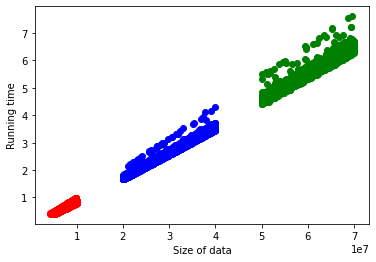

In [ ]:
#Plotting train_set và test_set cùng đồ thị, red là train, blue là test data1, green là test data4

plt.scatter(train_set.X, train_set.y, color = 'red')
plt.scatter(test_set.X, test_set.y, color = 'blue')
plt.scatter(test_set_4.X, test_set_4.y, color = 'green')
plt.xlabel("Size of data")
plt.ylabel("Running time")
plt.show()

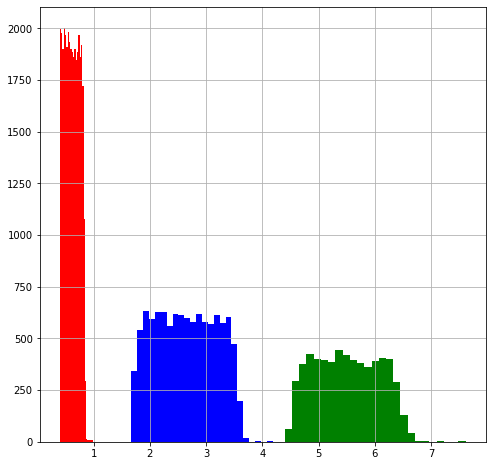

In [ ]:
train_set.y.hist(bins = 25, figsize = (8, 8), color = 'red')
test_set.y.hist(bins = 25, figsize = (8, 8), color = 'blue')
test_set_4.y.hist(bins = 25, figsize = (8, 8), color = 'green')

# **MODELING 1 BIẾN** 


# **TRAIN MODEL**

In [ ]:
#Train model
clf = LinearRegression()

In [ ]:
X_train = np.asanyarray(train_set[['X']])
y_train = np.asanyarray(train_set[['y']])
clf.fit(X_train, y_train)

# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ', clf.intercept_)

Coefficients:  [[8.68544766e-08]]
Intercept:  [-0.03257747]


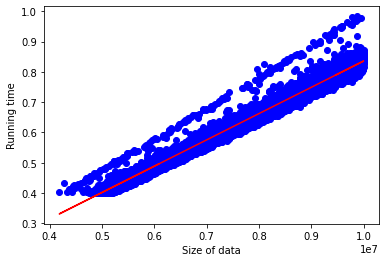

In [ ]:
#Plotting fit line on train_set
plt.scatter(train_set.X, train_set.y, color = 'blue')
plt.plot(X_train, clf.coef_[0][0]*X_train + clf.intercept_[0], '-r')
plt.xlabel("Size of data")
plt.ylabel("Running time")
plt.show()

# **TEST MODEL**

**TEST TRÊN TẬP DATA1**

**Tính y_pred từ model vừa train**

In [ ]:
X_test = test_set[['X']]
y_test = test_set[['y']]

In [ ]:
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
y_pred

array([[3.25378851],
       [3.21536704],
       [3.14723674],
       ...,
       [2.87881264],
       [1.8124951 ],
       [1.82441327]])

In [ ]:
y_test

,y
0,4.12166
1,3.92089
2,3.21540
3,2.54506
4,2.21831
...,...
10585,2.35117
10586,1.79155
10587,2.90918
10588,1.80292


In [ ]:
#Lập bảng so sánh y_pred và y_test
y_pred1 = pd.DataFrame(y_pred, columns = ['y_pred'])
y_test1 = y_test.rename(columns = {'y':'y_test'})
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew

,y_test,y_pred
0,4.12166,3.253789
1,3.92089,3.215367
2,3.21540,3.147237
3,2.54506,2.534463
4,2.21831,2.219404
...,...,...
10585,2.35117,2.301419
10586,1.79155,1.769984
10587,2.90918,2.878813
10588,1.80292,1.812495


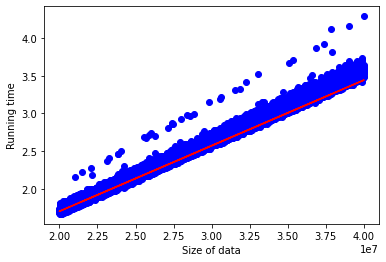

In [ ]:
#Plotting fit line on test_set 
plt.scatter(test_set.X, test_set.y, color = 'blue')
plt.plot(X_test, clf.coef_[0][0]*X_test + clf.intercept_[0], '-r')
plt.xlabel("Size of data")
plt.ylabel("Running time")
plt.show()

**Đánh giá bằng điểm MSE, R2, MAE**

In [ ]:
print('MSE:', round(MSE(y_test, y_pred), 6))
print('MAE:', round(MAE(y_test, y_pred), 6))
print('R2:', round(R2(y_test, y_pred), 6))

MSE: 0.009514
MAE: 0.07385
R2: 0.967043


**Đánh giá:**
- Điểm R2 khá tốt.
- Điểm MSE và MAE khá thấp, bởi vì giá trị y ban đầu đều khá nhỏ.
- Dựa trên kết quả từ bảng so sánh y_test, y_pred và khi vẽ fit line lên bộ test, có thể thấy model có góc tăng khá thấp so với bộ test, nên với các giá trị x càng lớn, y_pred và y_test càng lệch.
- Nguyên nhân có thể là do có sự khác biệt khá rõ ràng giữa tập train và tập test, ví dụ như giá trị X, y của tập train từ xấp xỉ [0-1] còn tập test xấp xỉ ,[2-4] (dễ thấy từ kết quả desribe và plotting hai tập dữ liệu). Cách khắc phục có thể là nên tăng tính đa dạng, khách quan cho tập train hơn so với bộ ban đầu, trong bước xử lý dữ liệu nhóm đã loại bỏ bớt các datapoint quá nhỏ.

**TEST TRÊN TẬP DATA 4**

In [ ]:
#Tạo tập test data4
X_test_4 = test_set_4[['X']]
y_test_4 = test_set_4[['y']]

In [ ]:
#Predict y_pred_4
y_pred_4 = clf.predict(X_test_4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
#Lập bảng so sánh y_test_4 và y_pred_4

y_pred4 = pd.DataFrame(y_pred_4, columns = ['y_pred_4'])
y_test4 = y_test_4.rename(columns = {'y':'y_test_4'})
ynew = pd.concat([y_test4, y_pred4], axis=1)
ynew

,y_test_4,y_pred_4
0,5.51836,4.322485
1,7.18304,5.633160
2,6.94395,5.846058
3,5.48383,5.161186
4,5.65503,5.378206
...,...,...
6018,4.95203,4.663027
6019,6.28587,5.832682
6020,5.57836,5.245686
6021,5.78302,5.405166


**Đánh giá bằng MSE, MAE, R2**

In [ ]:
print('MSE:', round(MSE(y_test_4, y_pred_4), 6))
print('MAE:', round(MAE(y_test_4, y_pred_4), 6))
print('R2:', round(R2(y_test_4, y_pred_4), 6))

MSE: 0.126943
MAE: 0.330818
R2: 0.611299


**Đánh giá:**

- Các điểm đánh giá tệ đi khá nhiều.
- X càng tăng, y càng chênh lệch nhiều.
=> Linear regression 1 biến không thực sự ổn trong trường hợp này.

# **POLY**

**Sinh các feature mới từ x ban đầu**

In [ ]:
#Tạo ma trận mới có với cột đầu là giá trị X train gốc
train_set_new = train_set.copy()

In [ ]:
train_set

,X,y
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977
...,...,...
71110,4472112,0.350379
71111,5471895,0.429955
71112,9837364,0.801394
71113,9466593,0.776407


In [ ]:
#Khởi sinh các cột feature khác từ việc biến đổi X
train_set_new['sqrt(X)'] = train_set_new['X'].apply(math.sqrt)

In [ ]:
train_set_new['log(X)'] = train_set_new['X'].apply(math.log)

In [ ]:
train_set_new['Xlog(X)'] = train_set_new['X']*train_set_new['X'].apply(math.log)

In [ ]:
train_set_new['X^2'] = train_set_new['X'].pow(2)

In [ ]:
train_set_new.reindex(['log(X)', 'sqrt(X)', 'X', 'Xlog(X)', 'X^2', 'y'], axis="columns")

,log(X),sqrt(X),X,Xlog(X),X^2,y
0,15.621123,2466.514748,6083695,9.503415e+07,37011344853025,0.521842
1,14.485577,1397.986767,1954367,2.831013e+07,3819550370689,0.152648
2,15.133040,1932.403943,3734185,5.650957e+07,13944137614225,0.298548
3,15.580122,2416.464566,5839301,9.097702e+07,34097436168601,0.460480
4,15.662930,2518.616088,6343427,9.935665e+07,40239066104329,0.527977
...,...,...,...,...,...,...
71110,15.313371,2114.736863,4472112,6.848311e+07,19999785740544,0.350379
71111,15.515136,2339.208199,5471895,8.489719e+07,29941634891025,0.429955
71112,16.101698,3136.457237,9837364,1.583983e+08,96773730468496,0.801394
71113,16.063280,3076.782898,9466593,1.520645e+08,89616383027649,0.776407


In [ ]:
#Tập test data1
test_set_new = test_set.copy()
#Khởi sinh các cột feature khác từ việc biến đổi X
test_set_new['sqrt(X)'] = test_set_new['X'].apply(math.sqrt)
test_set_new['log(X)'] = test_set_new['X'].apply(math.log)
test_set_new['Xlog(X)'] = test_set_new['X']*test_set_new['X'].apply(math.log)
test_set_new['X^2'] = test_set_new['X'].pow(2)
test_set_new.reindex(['log(X)', 'sqrt(X)', 'X', 'Xlog(X)', 'X^2', 'y'], axis="columns")

,log(X),sqrt(X),X,Xlog(X),X^2,y
0,17.448814,6151.228495,37837612,6.602215e+08,1431684881862544,4.12166
1,17.437054,6115.165247,37395246,6.520629e+08,1398404423400516,3.92089
2,17.415855,6050.688143,36610827,6.376088e+08,1340352653623929,3.21540
3,17.201786,5436.510922,29555651,5.084100e+08,873536506033801,2.54506
4,17.070842,5091.975648,25928216,4.426165e+08,672272384942656,2.21831
...,...,...,...,...,...,...
10585,17.106614,5183.868633,26872494,4.596974e+08,722130933780036,2.35117
10586,16.848240,4555.635082,20753811,3.496652e+08,430720671023721,1.79155
10587,17.327662,5789.673825,33520323,5.808288e+08,1123612054024329,2.90918
10588,16.871550,4609.041549,21243264,3.584068e+08,451276265373696,1.80292


In [ ]:
#Tập test data4

test_set_4_new = test_set_4.copy()
#Khởi sinh các cột feature khác từ việc biến đổi X
test_set_4_new['sqrt(X)'] = test_set_4_new['X'].apply(math.sqrt)
test_set_4_new['log(X)'] = test_set_4_new['X'].apply(math.log)
test_set_4_new['Xlog(X)'] = test_set_4_new['X']*test_set_4_new['X'].apply(math.log)
test_set_4_new['X^2'] = test_set_4_new['X'].pow(2)
test_set_4_new.reindex(['log(X)', 'sqrt(X)', 'X', 'Xlog(X)', 'X^2', 'y'], axis="columns")

,log(X),sqrt(X),X,Xlog(X),X^2,y
0,17.730371,7081.105634,50142057,8.890373e+08,2514225880191249,5.51836
1,17.993469,8076.665834,65232531,1.173760e+09,4255283100665961,7.18304
2,18.030357,8227.012884,67683741,1.220362e+09,4581088795755081,6.94395
3,17.906490,7732.945687,59798449,1.070780e+09,3575854502805601,5.48383
4,17.947426,7892.852399,62297119,1.118073e+09,3880931035700161,5.65503
...,...,...,...,...,...,...
6018,17.805659,7352.747446,54062895,9.626255e+08,2922796615781025,4.95203
6019,18.028078,8217.647291,67529727,1.217431e+09,4560264028694529,6.28587
6020,17.922629,7795.598117,60771350,1.089182e+09,3693156980822500,5.57836
6021,17.952396,7912.491769,62607526,1.123955e+09,3919702311840676,5.78302


**Preprocessing data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


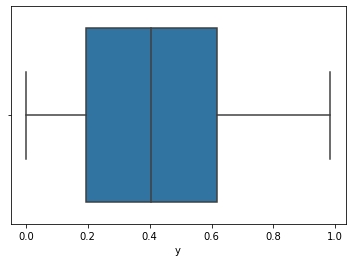

In [ ]:
#Check outliers
sns.boxplot(train_set_new['y'])

In [ ]:
#Train, test split
X_train_ = train_set_new.drop(columns = ['y'])
y_train_ = train_set_new['y']

X_test_1 = test_set_new.drop(columns = ['y'])
y_test_1 = test_set_new['y']

X_test_4 = test_set_4_new.drop(columns = ['y'])
y_test_4 = test_set_4_new['y']


**TRAIN MODEL**

In [ ]:
clf_ = LinearRegression()

In [ ]:
clf_.fit(X_train_, y_train_)
print('Coefficients: ', clf_.coef_)

Coefficients:  [ 2.15056095e-08 -5.52926062e-06  4.20547173e-04  3.93118611e-09
  3.12021527e-17]


**TEST MODEL TẬP DATA 1**

In [ ]:
#Predict y_pred
y_pred_poly_1 = clf_.predict(X_test_1)

**Đánh giá bằng điểm MSE, MAE, R2**

In [ ]:
print('MSE:', round(MSE(y_test_1, y_pred_poly_1), 6))
print('MAE:', round(MAE(y_test_1, y_pred_poly_1), 6))
print('R2:', round(R2(y_test_1, y_pred_poly_1), 6))

MSE: 0.004882
MAE: 0.054672
R2: 0.983086


**TEST MODEL TẬP DATA 4**

In [ ]:
#Predict y_pred
y_pred_poly_4 = clf_.predict(X_test_4)

**Đánh giá bằng điểm MSE, MAE, R2**

In [ ]:
print('MSE:', round(MSE(y_test_4, y_pred_poly_4), 6))
print('MAE:', round(MAE(y_test_4, y_pred_poly_4), 6))
print('R2:', round(R2(y_test_4, y_pred_poly_4), 6))

MSE: 0.021187
MAE: 0.116575
R2: 0.935125


**KẾT HỢP HAI TẬP TEST**

In [ ]:
#Concat 2 dataset
test_set_final = pd.concat([test_set_new, test_set_4_new])

In [ ]:
test_set_final

,X,y,sqrt(X),log(X),Xlog(X),X^2
0,37837612,4.12166,6151.228495,17.448814,6.602215e+08,1431684881862544
1,37395246,3.92089,6115.165247,17.437054,6.520629e+08,1398404423400516
2,36610827,3.21540,6050.688143,17.415855,6.376088e+08,1340352653623929
3,29555651,2.54506,5436.510922,17.201786,5.084100e+08,873536506033801
4,25928216,2.21831,5091.975648,17.070842,4.426165e+08,672272384942656
...,...,...,...,...,...,...
6018,54062895,4.95203,7352.747446,17.805659,9.626255e+08,2922796615781025
6019,67529727,6.28587,8217.647291,18.028078,1.217431e+09,4560264028694529
6020,60771350,5.57836,7795.598117,17.922629,1.089182e+09,3693156980822500
6021,62607526,5.78302,7912.491769,17.952396,1.123955e+09,3919702311840676


In [ ]:
#Split test set
X_test_final = test_set_final.drop(columns = ['y'])
y_test_final = test_set_final['y']

In [ ]:
#Predict y_pred
y_pred_poly_final = clf_.predict(X_test_final)

**Đánh giá bằng điểm MSE, MAE, R2**

In [ ]:
print('MSE:', round(MSE(y_test_final, y_pred_poly_final), 6))
print('MAE:', round(MAE(y_test_final, y_pred_poly_final), 6))
print('R2:', round(R2(y_test_final, y_pred_poly_final), 6))

MSE: 0.010794
MAE: 0.077115
R2: 0.9951


**Đánh giá:**

- Sau khi áp dụng polynomial, model đã có các điểm đánh giá tốt hơn đáng kể, cụ thể:
    - Test 1, R2 scores: 0.967043 -> 0.983086
    - Test 4, R2 scores: 0.611299 -> 0.935125
    - Khi gộp 2 test set, R2 scores: 0.9951